In [1]:
from GG_mthesis import *
%matplotlib inline

#to muove files (not needed anymore, but useful code for future)
import shutil
import os
destination = "D:\\GU\\Thesis\\data\\AVISO\\SEALEVEL_GLO_PHY_L4_MY_008_047\\all_files"
base = "D:\\GU\\Thesis\\data\\AVISO\\SEALEVEL_GLO_PHY_L4_MY_008_047\\cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D\\"
years = os.listdir("D:\\GU\\Thesis\\data\\AVISO\\SEALEVEL_GLO_PHY_L4_MY_008_047\\cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D")
months = os.listdir("D:\\GU\\Thesis\\data\\AVISO\\SEALEVEL_GLO_PHY_L4_MY_008_047\\cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D\\2000")
for i_year in years:
    for i_month in months:
        days = os.listdir(base+i_year+"\\"+i_month)
        for i_days in days:
            file_name = base+i_year+"\\"+i_month+"\\"+i_days
            shutil.move(file_name, destination)

In [2]:
df_bx = pd.read_csv('data/03_processed/SOCAT/data_gridded_distance', index_col=0)

In [3]:
df_bx

,lon,lat,SA,CT,rho,time,bx,bx_abs,cruise_id
0,-57.294120,-62.500913,34.342633,0.350104,1027.427922,2008-03-30 11:03:58.960871,-1.361252e-08,1.361252e-08,06AQ20080209
1,-57.312505,-62.497946,34.341549,0.359767,1027.426506,2008-03-30 11:06:25.622327,-1.352605e-08,1.352605e-08,06AQ20080209
2,-57.330907,-62.495002,34.340460,0.369481,1027.425081,2008-03-30 11:08:52.653996,-1.360813e-08,1.360813e-08,06AQ20080209
3,-57.349528,-62.492378,34.340231,0.375702,1027.424544,2008-03-30 11:11:18.424166,-5.136041e-09,5.136041e-09,06AQ20080209
4,-57.368311,-62.490010,34.341134,0.380103,1027.425017,2008-03-30 11:13:43.022823,4.524459e-09,4.524459e-09,06AQ20080209
...,...,...,...,...,...,...,...,...,...
115386,-57.772283,-55.786798,34.311949,5.050515,1026.997363,2018-11-05 07:38:27.424749,3.355100e-09,3.355100e-09,74JC20181103
115387,-57.739134,-55.797232,34.311955,4.986319,1027.004721,2018-11-05 08:59:08.745235,7.027874e-08,7.027874e-08,74JC20181103
115388,-57.702873,-55.806750,34.311962,4.724459,1027.034189,2018-11-05 10:20:20.456466,2.814821e-07,2.814821e-07,74JC20181103
115389,-57.668481,-55.814532,34.301920,4.629977,1027.036658,2018-11-05 12:18:35.508688,2.358154e-08,2.358154e-08,74JC20181103


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


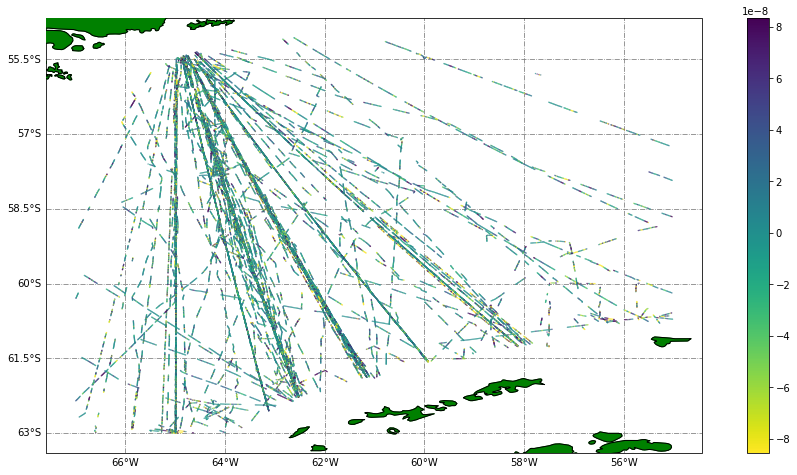

In [69]:
from GG_mthesis.d01_data.processing import rmap 
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=projection)
bx = ax.scatter(df_bx['lon'], df_bx['lat'], c=df_bx['bx'], s=0.1,transform=ccrs.PlateCarree(), zorder=500, cmap='viridis_r',
                vmax=np.percentile(df_bx['bx'], 95), vmin=np.percentile(df_bx['bx'], 5))
ax.coastlines(zorder=100)
ax.add_feature(cartopy.feature.LAND, color='green', zorder=50)
gl = ax.gridlines(draw_labels=True, linestyle='-.', color='gray')
gl.xlabels_top = False
gl.ylabels_right = False
fig.colorbar(bx)

#fronts=rmap.load_fronts('data/01_raw/ACC_FRONTS/PARK/62985.nc')
#fronts=rmap.sel_front_region(fronts, lon_min=-64, lon_max=-60, lat_min=-60, lat_max=-58.1)
#s=4
#SAF = ax.plot(fronts.loc['SAF']['longitude'], fronts.loc['SAF']['latitude'],transform=ccrs.PlateCarree(), label='SAF_Park', color='purple')#, s=s)
#PF = ax.plot(fronts.loc['PF']['longitude'], fronts.loc['PF']['latitude'], transform=ccrs.PlateCarree(), label='PF_Park', color='black')#, s=s)
#SACCF = ax.plot(fronts.loc['SACCF']['longitude'], fronts.loc['SACCF']['latitude'],transform=ccrs.PlateCarree(), label='SACCF_Park', color='yellow')#, s=s)
#NB = ax.plot(fronts.loc['NB']['longitude'], fronts.loc['NB']['latitude'],transform=ccrs.PlateCarree(), label='NB_Park', color='red')#, s=s)
#SB = ax.plot(fronts.loc['SB']['longitude'], fronts.loc['SB']['latitude'],transform=ccrs.PlateCarree(), label='SB_Park', color='red')#, s=s)
#ax.set_extent([-63.3, -63.5, -58.5, -58.4])

In [4]:
count=0
for i in df_bx['bx']:
    if i > 1E-7: 
        count += 1

In [5]:
count

6765

In [16]:
#xr.open_mfdataset('D:/GU/Thesis/data/AVISO/SEALEVEL_GLO_PHY_L4_MY_008_047/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D/2001/01/*.nc', parallel=True, engine='netcdf4')

In [3]:
ds_adt = xr.open_mfdataset(r'D:/GU/Thesis/data/AVISO/SEALEVEL_GLO_PHY_L4_MY_008_047/all_files/*', parallel=True, engine="netcdf4")

#Center longitude format to Atlantic.
ds_adt = ds_adt.assign_coords(longitude=(((ds_adt.longitude + 180) % 360)-180)).sortby('longitude')
ds_adt.longitude.attrs = {
    'long_name': 'Longitude',
    'standard_name': 'longitude',
    'units': 'degrees_east',
    'bounds': 'lon_bnds',
    'axis': 'X',
    'valid_max': 179.9375,
    'valid_min': -179.9375,
    '_CoordinateAxisType': 'Lon'}


In [4]:
ds_adt['adt_diff'] = ds_adt['adt'].diff('latitude')
ds_adt['sla_diff'] = ds_adt['sla'].diff('latitude')


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [73]:
ds_adt

<xarray.Dataset>
Dimensions:    (latitude: 36, time: 7885, longitude: 100)
Coordinates:
  * latitude   (latitude) float32 -62.88 -62.62 -62.38 ... -54.62 -54.38 -54.12
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2021-08-02
  * longitude  (longitude) float32 -75.88 -75.62 -75.38 ... -51.62 -51.38 -51.12
Data variables:
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 36, 100), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 36, 100), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 36, 100), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 36, 100), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 36, 100), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 36, 100), meta=np.ndarray>
    adt_diff   (time, latitude, longitude) float64 dask.array<chunksize=(1, 36, 100), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2000-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1999-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

#Start year and end year
START_YEAR  = 2000
END_YEAR    = 2022 #NOT INCLUDED
NUMBER_YEAR = 21


years = range(START_YEAR, END_YEAR)
months = ['%.2d' % i for i in range(1,13)]
number_years = range(NUMBER_YEAR)

#Input paths of the files
base_adt_path = 'D:/GU/Thesis/data/AVISO/SEALEVEL_GLO_PHY_L4_MY_008_047/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D' #
#adt_file_name_base = 'dt_global_twosat_phy_l4_'


#Main file reading algorithm. Multifile reader of xarray which concanates the read files (loading through dask). Additional loop and concanating of each month and years (THIS IS JUST FOR THE FIRST YEAR, CHANGE INDEX OF YEARS (MAY HAVE TO LOOP THROUGH))
ds_adt = xr.concat([xr.concat([[xr.open_mfdataset(base_adt_path + '/' + str(i_year) + '/' + i_month + '/' + '*.nc', parallel = True, engine="netcdf4") for i_month in months] for i_year in years][n_year], dim='time') for n_year in number_years], dim='time')

#Center longitude format to Atlantic.
ds_adt = ds_adt.assign_coords(longitude=(((ds_adt.longitude + 180) % 360)-180)).sortby('longitude')
ds_adt.longitude.attrs = {
    'long_name': 'Longitude',
    'standard_name': 'longitude',
    'units': 'degrees_east',
    'bounds': 'lon_bnds',
    'axis': 'X',
    'valid_max': 179.9375,
    'valid_min': -179.9375,
    '_CoordinateAxisType': 'Lon'}

In [5]:
ds_adt = ds_adt.drop_vars(['err_sla', 'err_ugosa', 'err_vgosa', 'flag_ice', 'tpa_correction', 'crs'])

ds_adt = ds_adt.sel(latitude=slice(-63,-54), longitude=slice(-76,-51))

ds_adt = ds_adt.drop_dims('nv')

In [6]:
datetime = []
for i in df_bx['time']:
    datetime.append(np.datetime64(i))
df_bx['time'] = datetime

In [7]:
da_adt_time_mean = ds_adt['adt'].mean('time')

In [8]:
da_sla_time_mean = ds_adt['sla'].mean('time')
da_sla_time_mean_interp = da_sla_time_mean.interp(longitude=('z', df_bx['lon']), latitude= ('z', df_bx['lat']), method='linear')

df_sla_mean = da_sla_time_mean_interp.to_dataframe()
df_sla_mean['sla_time_mean'] = df_sla_mean['sla']

df_bx['sla_mean'] = df_sla_mean['sla_time_mean']

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.ge

KeyboardInterrupt: 

In [13]:
df_sla_diff_mean

,longitude,latitude,sla_diff
z,,,
0,-57.294120,-62.500913,-0.000439
1,-57.312505,-62.497946,-0.000445
2,-57.330907,-62.495002,-0.000452
3,-57.349528,-62.492378,-0.000458
4,-57.368311,-62.490010,-0.000463
...,...,...,...
115386,-57.772283,-55.786798,0.005352
115387,-57.739134,-55.797232,0.005259
115388,-57.702873,-55.806750,0.005152


In [10]:
da_adt_time_mean = ds_adt['adt'].mean('time')
da_adt_diff_time_mean = ds_adt['adt_diff'].mean('time')
da_sla_time_mean = ds_adt['sla'].mean('time')
da_sla_diff_time_mean = ds_adt['sla_diff'].mean('time')

ds_adt_interpolated = ds_adt.interp(time=('z', df_bx['time'].values), longitude=('z', df_bx['lon']), latitude= ('z', df_bx['lat']), method='linear')
da_adt_time_mean_interp = da_adt_time_mean.interp(longitude=('z', df_bx['lon']), latitude= ('z', df_bx['lat']), method='linear')
da_adt_diff_time_mean_interp = da_adt_diff_time_mean.interp(longitude=('z', df_bx['lon']), latitude= ('z', df_bx['lat']), method='linear')
da_sla_time_mean_interp = da_sla_time_mean.interp(longitude=('z', df_bx['lon']), latitude= ('z', df_bx['lat']), method='linear')
da_sla_diff_time_mean_interp = da_sla_diff_time_mean.interp(longitude=('z', df_bx['lon']), latitude= ('z', df_bx['lat']), method='linear')


df_sla = ds_adt_interpolated['sla'].to_dataframe()
df_sla_diff = ds_adt_interpolated['sla_diff'].to_dataframe()
df_adt = ds_adt_interpolated['adt'].to_dataframe()
df_adt_diff = ds_adt_interpolated['adt_diff'].to_dataframe()

df_adt_mean = da_adt_time_mean_interp.to_dataframe()
df_adt_mean['adt_time_mean'] = df_adt_mean['adt']

df_adt_diff_mean = da_adt_diff_time_mean_interp.to_dataframe()
df_adt_diff_mean['adt_diff_time_mean'] = df_adt_diff_mean['adt_diff']

df_sla_mean = da_sla_time_mean_interp.to_dataframe()
df_sla_mean['sla_time_mean'] = df_sla_mean['sla']

df_sla_diff_mean = da_sla_diff_time_mean_interp.to_dataframe()
df_sla_diff_mean['sla_diff_time_mean'] = df_sla_diff_mean['sla_diff']

df_bx['adt_mean'] = df_adt_mean['adt_time_mean']
df_bx['adt_diff_mean'] = df_adt_diff_mean['adt_diff_time_mean']
df_bx['sla_mean'] = df_sla_mean['sla_time_mean']
df_bx['sla_diff_mean'] = df_sla_diff_mean['sla_diff_time_mean']
df_bx['sla'] = df_sla['sla']
df_bx['sla_diff'] = df_sla_diff['sla_diff']
df_bx['adt'] = df_adt['adt']
df_bx['adt_diff'] = df_adt_diff['adt_diff']

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.

In [15]:
df_sla_mean['sla_time_mean'] = df_sla_mean['sla']

df_sla_diff_mean = da_sla_diff_time_mean_interp.to_dataframe()
df_sla_diff_mean['sla_diff_time_mean'] = df_sla_diff_mean['sla_diff']

df_bx['adt_mean'] = df_adt_mean['adt_time_mean']
df_bx['adt_diff_mean'] = df_adt_diff_mean['adt_diff_time_mean']
df_bx['sla_mean'] = df_sla_mean['sla_time_mean']
df_bx['sla_diff_mean'] = df_sla_diff_mean['sla_diff_time_mean']
df_bx['sla'] = df_sla['sla']
df_bx['sla_diff'] = df_sla_diff['sla_diff']
df_bx['adt'] = df_adt['adt']
df_bx['adt_diff'] = df_adt_diff['adt_diff']

In [11]:
df_bx

,lon,lat,SA,CT,rho,time,bx,bx_abs,T_diff,S_diff,cruise_id,adt_mean,adt_diff_mean,sla_mean,sla_diff_mean,sla,sla_diff,adt,adt_diff
0,-57.294120,-62.500913,34.342633,0.350104,1027.427922,2008-03-30 11:03:58.960871,-1.361252e-08,1.361252e-08,0.009733,-1.091588e-03,06AQ20080209,-1.212931,0.003679,0.042488,-0.000439,0.099960,-0.002167,-1.155462,0.001945
1,-57.312505,-62.497946,34.341549,0.359767,1027.426506,2008-03-30 11:06:25.622327,-1.352605e-08,1.352605e-08,0.009663,-1.083770e-03,06AQ20080209,-1.213226,0.003710,0.042478,-0.000445,0.099768,-0.002265,-1.155940,0.001881
2,-57.330907,-62.495002,34.340460,0.369481,1027.425081,2008-03-30 11:08:52.653996,-1.360813e-08,1.360813e-08,0.009714,-1.089432e-03,06AQ20080209,-1.213517,0.003752,0.042467,-0.000452,0.099580,-0.002355,-1.156410,0.001837
3,-57.349528,-62.492378,34.340231,0.375702,1027.424544,2008-03-30 11:11:18.424166,-5.136041e-09,5.136041e-09,0.006221,-2.294864e-04,06AQ20080209,-1.213815,0.003799,0.042458,-0.000458,0.099403,-0.002428,-1.156877,0.001814
4,-57.368311,-62.490010,34.341134,0.380103,1027.425017,2008-03-30 11:13:43.022823,4.524459e-09,4.524459e-09,0.004401,9.037181e-04,06AQ20080209,-1.214118,0.003851,0.042448,-0.000463,0.099234,-0.002486,-1.157341,0.001809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115386,-57.772283,-55.786798,34.311949,5.050515,1026.997363,2018-11-05 07:38:27.424749,3.355100e-09,3.355100e-09,-0.003051,8.965871e-07,74JC20181103,0.002124,0.098875,0.040260,0.005352,0.079249,0.059486,0.041125,0.153017
115387,-57.739134,-55.797232,34.311955,4.986319,1027.004721,2018-11-05 08:59:08.745235,7.027874e-08,7.027874e-08,-0.064195,6.167227e-06,74JC20181103,-0.003106,0.099456,0.039964,0.005259,0.068496,0.057854,0.025438,0.152049
115388,-57.702873,-55.806750,34.311962,4.724459,1027.034189,2018-11-05 10:20:20.456466,2.814821e-07,2.814821e-07,-0.261861,6.265932e-06,74JC20181103,-0.008152,0.099990,0.039684,0.005152,0.057034,0.055922,0.009213,0.150751
115389,-57.668481,-55.814532,34.301920,4.629977,1027.036658,2018-11-05 12:18:35.508688,2.358154e-08,2.358154e-08,-0.094482,-1.004180e-02,74JC20181103,-0.012495,0.100429,0.039446,0.005046,0.047440,0.053862,-0.004481,0.149230


In [84]:
ds_time_mean = ds_adt.mean('time')

In [ ]:
ds_time_mean.to_netcdf(r'data/03_processed/SOCAT/ssh_time_mean')

In [60]:
da_adt_time_mean.to_netcdf(r'data/03_processed/SOCAT/adt_time_mean')

In [79]:
df_bx.to_csv(r'data/03_processed/SOCAT/data_gridded_SSH_2')